# **Understanding natural language opinions**
## **with PCA and Topic Modeling techniques.**

### Objetivos:

    Evaluar el pipeline agregando PCA.
    Mejor modelo: KMeans con PCA

Comparacion KMeans sin y con PCA
12: mejor
no identificado
persp sociales
centro
liberalismo + control del estado

no identificado
control del estado
centro
NO me identifico + Decadencia politica
Peronismo + persp social

13: mejor
no identificado
izquierda
izquierda + razones sociales
derecha

no identificado
izquierda
izquierda + razones sociales
derecha

14: mejor
no tengo
cfk
otros + razones
otros

no tengo
otros + razones
cfk
otros
Favaloro

15: mejor
de acuerdo
ayuda no debe ser solo economica
estado debe garantizar
garantizar trabajo
de acuerdo + plan

de acuerdo
estado debe garantizar y su rol
en contra
de acuerdo pero con ajustes

16: mejor
acuerdo/desacuerdo
falta info
control
no deberian ir directo a empresas
rol empresas

acuerdo/desacuerdo
falta info
control
no deberian ir directo a empresas
subsidio trabajador

17: peor
lugares fisicos
herramientas, seminarios, cursos, talleres
excursiones
mejores horarios
menu

cursos, herramientas, charlas, 
excursiones
mejores horarios
menu

18: peor
horarios inconvenientes
carga horaria
ciclo fundamentos
baches
materias

horarios inconvenientes
carga horaria
ciclo fundamentos
rendir
materias

Comparacion HDBSCAN con y sin PCA
12: igual
izq
anarquismo
no cree sea respondible
no identificado

izq
anarquismo
no cree sea respondible
no identificado


13: igual
izq
derecha
mala exp en Arg
izq por derechos
izq por dis riqueza

izq
derecha
mala exp en Arg
izq por derechos
izq por dis riqueza

14: igual
no tengo
fava
alfonsin
fava + deportistas
cfk + norita cañas

no tengo
fava
alfonsin
fava + deportistas
cfk + norita cañas

15: igual
de acuerdo
respons del estado

de acuerdo
respons del estado


16: igual
de acuerdo
desacuerdo
falta info
interesante

de acuerdo
desacuerdo
falta info
interesante


17: igual
excursiones
menu
cursos de diseño
mejores horarios
menos carga
mas tiempo libre
lugares fisicos + materias

excursiones
menu
cursos de diseño
mejores horarios
menos carga
mas tiempo libre
lugares fisicos + materias


18: igual
horarios
horario almuerzo
carga horaria
horarios cursada 
ciclo fundamentos
horarios esparcidos
materias
materias + parciales

horarios
horario almuerzo
carga horaria
horarios cursada 
ciclo fundamentos
horarios esparcidos
materias
materias + parciales

## Preprocess

In [1]:
path_to_MyModule = '..'

import sys
sys.path.insert(0, path_to_MyModule) 

import pandas as pd
import matplotlib.pyplot as plt
from time import sleep

from MyModule.GeneralFunctions import *
from MyModule.SummarizationFunctions import *
from MyModule.SummarizationFunctions import MostRepresentativeDocs
from MyModule.SamplingFunctions import *
from MyModule.SemanticSimilarityFunctions import *
from MyModule.TopicModelingFunctinos import *

In [2]:
df = pd.read_excel('..\datos.xlsx')[['ID','texto','desafio']]

In [3]:
# Limpieza
df.drop_duplicates(subset='texto', inplace=True)

# Quitando texto de mas en columna "desafio"
df['desafio'] = df['desafio'].apply(lambda x: re.findall('[0-9]+', x)[0])

# A str
df['texto'] = df['texto'].astype(str)

In [4]:
# Helpers

import textwrap
def print_list(elements):
    "Make results fit the output"
    for element in elements:
        wrapped = []
        for item in element:
            wrapped.extend(textwrap.wrap(str(item), width=150))
        for line in wrapped:
            print(line)
        print()

## Select a desafio and n_clusters

In [5]:
data = df[df['desafio']=='12']['texto'].values

n_clusters = 6
n_pca = 120

## Select the most representative documents of each desafio's cluster

1. Obtener un vector semántico para cada documento (utilizando SentenceTransformers)
2. Clusterizar los documentos en base a sus vectores (utilizando KMeans o HDBScan)
3. Evaluar la similitud coseno de cada documento con el centroide de su cluster
4. Devolver los documentos ordenados de mayor a menos similitud

Así, los documentos son presentados en el orden en el que más capturan el significado y las ideas expresadas por la mayoria.

In [17]:
pp_object = Preprocess(lemma=False, stopwords=False)
mrd = MostRepresentativeDocs(cluster_algorithm='kmeans', n_pca=n_pca)

Reducing embedding dimensions to 67


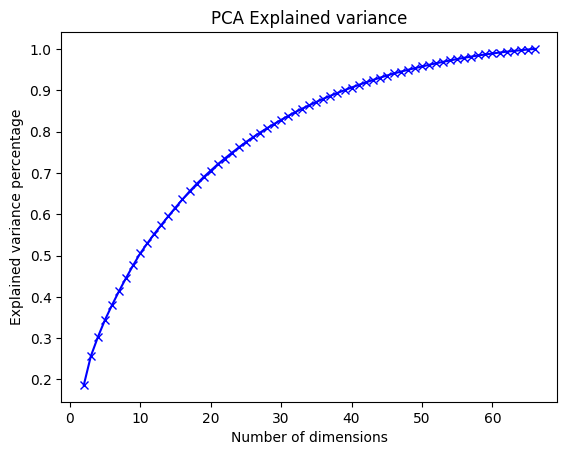

In [18]:
mrd.elbow_pca_explained_variance(data)

In [16]:
# all_res = {}
# for des in df['desafio'].unique():
#     this_data = df[df['desafio']==des]['texto'].values.tolist()
#     result = mrd.get_representatives(this_data, 5, pp_object)
#     all_res[des] = result

In [19]:
result = mrd.get_representatives(data, n_clusters=n_clusters, pp_object=None)

Reducing embedding dimensions to 67


In [451]:
mrd.get_average_silhouette_score()

0.08539382

In [20]:
print_list(result[0])

No tengo ni puta idea que es un termino politico economico
0.73139596

No creo que haya una ideologia politica que resuelva las distintas problematicas a perpetuidad. Por eso no tengo un pensamiento politico totalmente
definido. En la actualidad me parece que los partidos de izquierda son los que mas me representan, mas alla que hay muchisimas cosas en las que
podrian mejorar
0.6384937

No estoy interesado en la politica
0.6213699

No tengo una opinion formada aún
0.6160089

No tengo una ideología política económica definida
0.59794277

No puedo definirme ideológicamente en estos términos porque desconozco a qué hace referencia
0.5180751

Hoy en dia no me siento interesada en el tema ni en debatir al respecto. Siento que no tenemos control alguno sobre la politica o la economia,
sentarse a debatir con una persona sobre esto u opinar o charlar al respecto, enojarse, indignarse o hacerse mala sangre es totalmente inutil. No
tenemos ningun control sobre lo que pasa en el pais, el unico mo

In [395]:
mrd.get_cluster_silhouette_score(4)

0.11967466

## Find clusters in cluster

In [737]:
mrd_cluster = MostRepresentativeDocs(cluster_algorithm='kmeans', n_pca=n_pca)
only_text = [v[0] for v in result[8]]
result_cluster = mrd_cluster.get_representatives(only_text, n_clusters=5, pp_object=None)
data = only_text.copy()

Reducing embedding dimensions to 19


In [409]:
mrd_cluster.get_cluster_silhouette_score(3)

0.16317864

In [742]:
print_list(result_cluster[2])

Más sillitas para sentarse en el campus, más espacios con sombra natural, horarios de la combi más puntuales (desde la estación victoria siempre algún
retraso tiene y eso hace que lleguemos tarde a clases)
0.6191901

Una aplicación para sigedu y el campus virtual para no tener que entrar solo en la web, hablando todavia de sigedu siempre se traba y tiene mal
conexión a la hora de la inscripción de las materias. Con la cuota que se paga creo que inversión no es un problema que falta en ese aspecto, faltan
lugares de descansos ya que está re de moda baches eternos de 3 horas donde los que viven lejos no tienen como voler a casa y estar sentado todo ese
tiempo es un plomazo. Aires condicionados en algunas aulas y biblioteca, faltarian más salas de estudio
0.57814884

La cursada sea menor, es decir, entiendo que el nivel de exigencia de esta facultad es alto y estoy de acuerdo. Pero, noto una incongruencia con la
exigencia externa a la cursada y la carga horaria. Se requiere mucho estudio 

# Comparacion de modelos

**Hugging face spanish models**

Keywords: spanish, sentence, embedding, encoder, similarity

https://huggingface.co/search/full-text?q=spanish

In [466]:
data = df[df['desafio']=='13']['texto'].values

n_clusters = 10
n_pca = 100

In [406]:
pp_object = Preprocess(lemma=False, stopwords=False)

# pre_trained = "dccuchile/bert-base-spanish-wwm-cased"

mrd_1 = MostRepresentativeDocs(model_algo='bert', 
                                        # pre_trained = pre_trained,
                                        cluster_algorithm='kmeans', n_pca=n_pca)

result_1 = mrd_1.get_representatives(data, n_clusters=n_clusters, pp_object=pp_object)

Using hiiamsid/sentence_similarity_spanish_es
Working with bert model.
Reducing embedding dimensions to 83


Working with bert.
Working with bert model.
Reducing embedding dimensions to 67


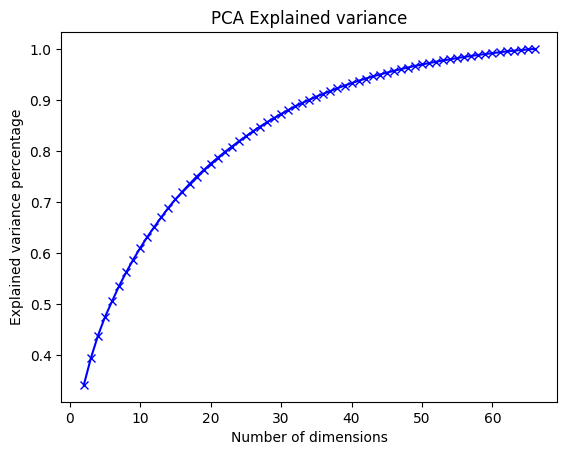

In [96]:
mrd_1.elbow_pca_explained_variance(data, pp_object=pp_object)

en contra
respo del estado
ps y trabajo

In [416]:
print_list(result_1[9])

Me parece una estupidez grande como una casa, la frase "está difícil conseguir trabajo por como está la economía" es una excusa para aquellos que
realmente no quieren trabajar, en el tema de los planes sociales estoy de acuerdo que sean asignados para aquellos que tengan discapacidades, gente
mayor, o que realmente puedan probar que están en necesidad, el tema de comida y medicamentos debería ser más regulado para que no sea "darles plata
para que tengan en el bolsillo" sino que tengan de verdad comida y los medicamentos que les hagan falta
0.5634468

Es estupido. La sociedad esta aplanada. La gente no quiere trabajar, no se quiere informar y pelea por peliar. Uno en la argentina es de un partido
politico como si fuese un equipo de futbol. La gente deberia pensar en la politica LIGADO al CONTEXTO en el que se encuentra. 70 anios de peronismo y
lo siguen votando? A la gente que defiende a maduro en venezuela, estan encontra de la libertad de expresion, atados a rusia y china. Le piden a

In [374]:
mrd_cluster = MostRepresentativeDocs(model_algo='bert', cluster_algorithm='kmeans', 
                                    #  pre_trained=pre_trained,
                                     n_pca=n_pca)
only_text = [v[0] for v in result_1[0]]
result_cluster = mrd_cluster.get_representatives(only_text, n_clusters=5, pp_object=pp_object)
data = only_text.copy()

Using hiiamsid/sentence_similarity_spanish_es


KeyboardInterrupt: 

In [340]:
print_list(result_cluster[2])

Últimamente me siento mas identificado con partidos de derecha liberal. Considero que los partidos de izquierda, en su mayoría, se han vuelto
demasiado extremistas en sus ideas y alejados de la realidad.
0.4494425

Derecha. No soy partidario de ningún político pero si tengo que decir que se acerca más a mi ideología diría que la derecha es más acertada
0.41934934

Me siento más identificada con partidos de izquierda porque tienen una visión que se acerca a la concepción de la política que tengo, o sea, a cómo
pienso la sociedad. Esto está ligado a la igualdad, acceso a derechos esenciales para los sujetos: educación, salud, DDHH, etc.
0.38698873

Izquierda. No comparto la totalidad de las propuestas de los partidos de izquierda, pero estoy más en desacuerdo con los partidos de derecha. Me
parece que políticas liberales no contribuyen al crecimiento de un país en desarrollo, no estoy de acuerdo con la idea de que el enriquecimiento de
una elite empresarial se "contagia" con el tiempo al

In [467]:
pp_object = Preprocess(lemma=False, stopwords=False)

pre_trained = '../Bert_Fine_Tuning/Models/model_epoch_0.pth'

mrd_2 = MostRepresentativeDocs(model_algo='fine_tuned_bert', cluster_algorithm='kmeans', n_pca=n_pca,
                               pre_trained = pre_trained)

result_2 = mrd_2.get_representatives(data, n_clusters=n_clusters, pp_object=pp_object)

Working with fine_tuned_bert model.
Reducing embedding dimensions to 95


In [480]:
print_list(result_2[2])

Partidos de DerechaPorque durante los gobiernos de Izquierda que hemos tenido  , no me sentí representada.
0.69253683

Derecha. Si bien, me gusta la ideología de la izquierda, no ví que funcionará y por eso elijo derecha
0.6759675

Un poco más con los de izquierda. No me gustan los partidos de derecha.
0.5923898

Un poco mas con los de izquierda .. pero con con casi ninguno me representa en la democracia burguesa
0.55747086

No me siento identificado con ninguno, pero me inclino más por los de derecha. Simplemente porque no comparto las ideas de la izquierda
0.548448

Me siento identificado un poco más a partidos de izquierda, pero básicamente prefiero partidos de centro. Creo que las categorías izquierda-derecha,
si bien representan algunos lineamientos generales de la población, tienden a tergiversar la interpretación de la realidad y generar falsas
controversias que nos alejan de soluciones pragmáticas que promuevan mejoras en el bienestar colectivo.
0.53575915

Izquierda en lo que 

In [481]:
mrd_cluster = MostRepresentativeDocs(model_algo='fine_tuned_bert', cluster_algorithm='kmeans', n_pca=n_pca, pre_trained=pre_trained)
only_text = [v[0] for v in result_2[2]]
result_cluster = mrd_cluster.get_representatives(only_text, n_clusters=5, pp_object=pp_object)
data = only_text.copy()

Working with fine_tuned_bert model.
Reducing embedding dimensions to 16


In [486]:
print_list(result_cluster[4])

Derecha. Si bien, me gusta la ideología de la izquierda, no ví que funcionará y por eso elijo derecha
0.81308687

Partidos de DerechaPorque durante los gobiernos de Izquierda que hemos tenido  , no me sentí representada.
0.7767924



# Comparacion KMeans PCA con HDBSCAN PCA

In [21]:
data = df[df['desafio']=='12']['texto'].values

n_clusters = 6
n_pca = 100

In [22]:
pp_object = Preprocess(lemma=False, stopwords=False)
mrd_kmeans = MostRepresentativeDocs(cluster_algorithm='kmeans', n_pca=n_pca)

result_kmeans = mrd_kmeans.get_representatives(data, n_clusters=n_clusters, pp_object=None)

Reducing embedding dimensions to 67


In [50]:
print_list(result_kmeans[2])

Izquierda. Calculo que gracias al pensamiento critico que me fomento la universidad.
0.5005506

Mi opinión es de mucho desncanto, al ver lo que los partidos políticos le hacen al país. Sólo les interesa llegar al poder y mantenerse ahí.
0.4648041

De derecha, creo que todos teniendo capacidades debemos trabajar, estudiar, aprender un oficio, y ganar recursos dignos para vivir. La izquierda abusa
de los planes eternos que no resuelven nada.
0.45210922

Partidos de derecha. Creo q el camino para salir adelante es el trabajo, el esfuerzo y educación.
0.40438762

Ni con unos ni con otros, porque no han servido ni sirven las ultranzas para resolver los problemas de la gente, al menos en Argentina. Yo creo en
gobiernos pragmáticos al servicio de toda la población (TODA), y si alguna vez apareciera en nuestro contexto esa posibilidad debería adoptar las
mejores políticas y prácticas de gestión, integrando ideas de derecha, izquierda y centro.Creo además que la gestión resuelve problemas, y qu

In [51]:
mrd_cluster = MostRepresentativeDocs(cluster_algorithm='kmeans', n_pca=n_pca)
only_text = [v[0] for v in result_kmeans[2]]
result_cluster = mrd_cluster.get_representatives(only_text, n_clusters=5, pp_object=None)
data = only_text.copy()

Reducing embedding dimensions to 24


In [60]:
print_list(result_cluster[2])

Partidos de derecha. Creo q el camino para salir adelante es el trabajo, el esfuerzo y educación.
0.73213184

Con los de derecha. Por que promueven el empleo y la propiedad privada, el reconocimiento al esfuerzo y reconocen el mérito.
0.54835504

Izquierda. Calculo que gracias al pensamiento critico que me fomento la universidad.
0.5245135

Descartó la izquierda en todas sus etapas. Valoro la libertad e igualdad , estuve en países comunistas y solo vi pobreza y tristeza. Creo en el
esfuerzo, trabajo y dedicación pero por sobre todo en la Libertad
0.47398445

De derecha, creo que todos teniendo capacidades debemos trabajar, estudiar, aprender un oficio, y ganar recursos dignos para vivir. La izquierda abusa
de los planes eternos que no resuelven nada.
0.41982195



In [61]:
pp_object = Preprocess(lemma=False, stopwords=False)

my_dict = {
    'min_cluster_size': 4, # Small minimum cluster size
    'min_samples': 1, # Allow singletons to be considered clusters
    'cluster_selection_epsilon': 0.1,
    'cluster_selection_method': 'leaf', # Favor smaller clusters
    'algorithm': 'best', # Use the more precise algorithm
    'metric': 'euclidean', # Euclidean distance metric
    'core_dist_n_jobs': -1, # Use all available cores for core distance calculations
    'allow_single_cluster': True, # Allow a single cluster to be returned
    'prediction_data': True, # Use prediction data to refine cluster boundaries
    'leaf_size': 40 # Leaf size for tree building
}

mrd_hdb = MostRepresentativeDocs(cluster_algorithm='hdbscan', n_pca=n_pca, **my_dict)

result_hdb = mrd_hdb.get_representatives(data, n_clusters=n_clusters, pp_object=None)

Reducing embedding dimensions to 24


In [63]:
print_list(result_hdb[-1])

Podría decirse que mas de derecha. En general son por motivos económicos por sobre todo. Tambien pesa bastante la mala experiencia con partidos de
"izquierda" en la Argentina, si bien coincido con varias premisas que plantean, la implementación y corrupción subyacente me han hecho reacio a
identificarme con ellos.
0.26392663

A veces si, a veces no.
0.24213386

Con los de derecha. Por que promueven el empleo y la propiedad privada, el reconocimiento al esfuerzo y reconocen el mérito.
0.18574576

Me siento identificado con los partidos de derecha. La izquierda se basa en el resentimiento y el usufructo del esfuerzo de terceros, en igualar hacia
abajo. No premia el esfuerzo.
0.18321624

Si hubiera que polarizar, diría izquierda. Pero Argentina acaba de perder, no tengo fuerzas para argumentar ni por qué CONICET debería mantenerme la
beca.
0.15937833

apartidario, descreo de los partidos
0.15775172

Izquierda. Al ser seres sociales y nuestra vida depender de otres no me cierran las postur

In [64]:
mrd_cluster = MostRepresentativeDocs(cluster_algorithm='hdbscan', n_pca=n_pca, **my_dict)
only_text = [v[0] for v in result_hdb[-1]]
result_cluster = mrd_cluster.get_representatives(only_text, n_clusters=5, pp_object=None)
data = only_text.copy()

Reducing embedding dimensions to 24


In [67]:
print_list(result_cluster[-1])

Izquierda Por tener conciencia  de clase, por influencia familiar, por que me gustan sus dirigentes políticos.
0.29001978

Me siento idemtificado con los partidos de derecha. Así de facil: abajo la casta, arriba Milei
0.18262899

Me siento identificado con los partidos de derecha. La izquierda se basa en el resentimiento y el usufructo del esfuerzo de terceros, en igualar hacia
abajo. No premia el esfuerzo.
0.1785295

Mi opinión es de mucho desncanto, al ver lo que los partidos políticos le hacen al país. Sólo les interesa llegar al poder y mantenerse ahí.
0.16350508

De ninguno porque fui a otro planeta y vi otros modos de organización social.
0.12410171

No con ninguno. Son los dos de izquierda y ninguno genera cambios. Tambien me parece que politizar las clases es un problema. La educacion deberia
siempre mostrar los dos lados y los profesores tienen que entender que somos otra generacion. Se me ocurren ejemplos de situaciones en clase que son
medio molestos.
0.08772516

Descartó la

# Word count plot

Plotear las palabras mas frecuentes para cada cluster

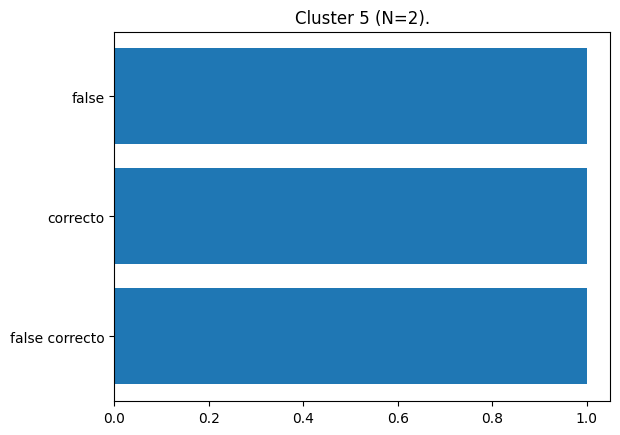

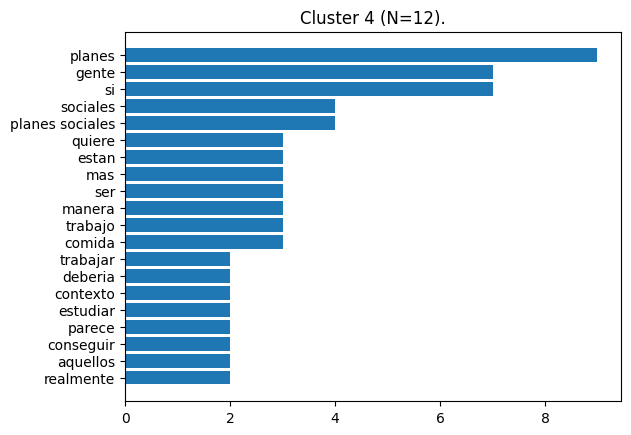

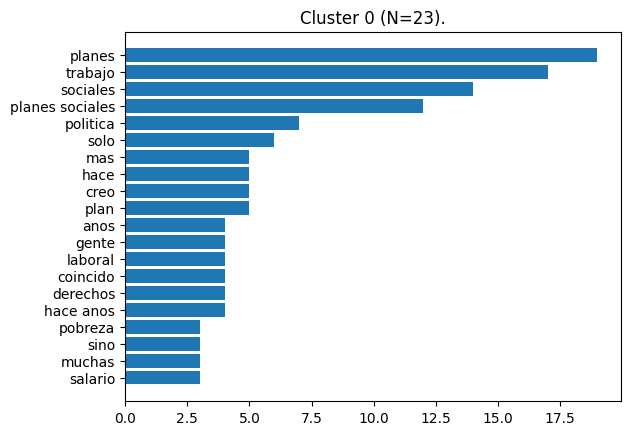

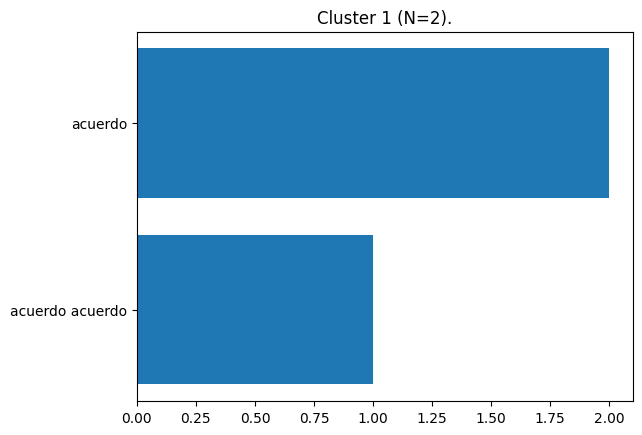

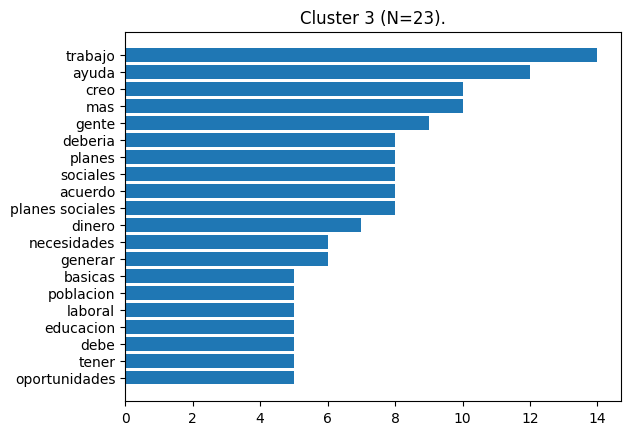

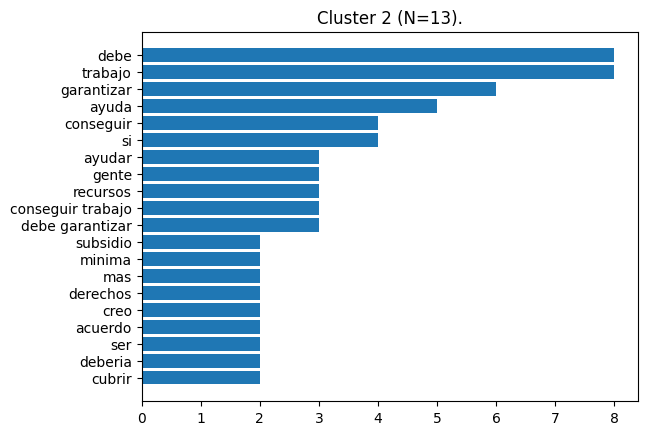

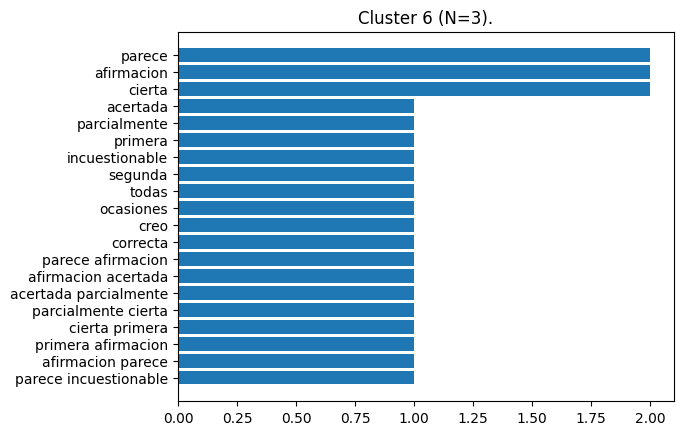

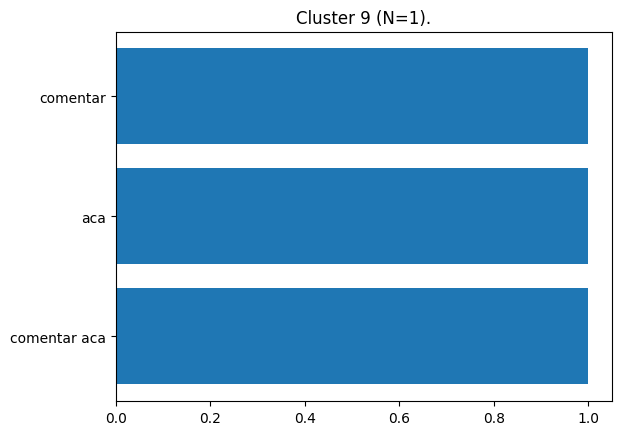

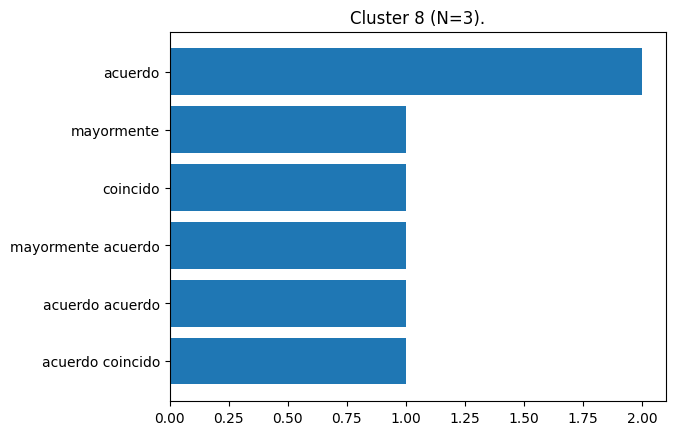

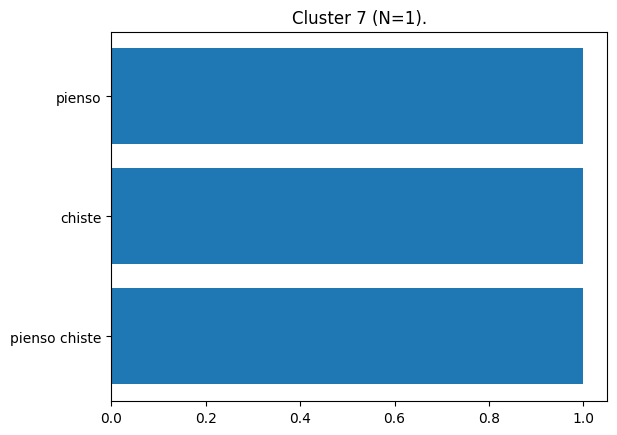

In [363]:
pp_object_transformers = Preprocess(lemma=False, stopwords=False, alphanumeric=False, join=False)
pp_object_word_count = Preprocess(lemma=False)

mrd_1.plot_word_counts(data, n_clusters=n_clusters, pp_object_transformers=pp_object_transformers, pp_object_word_count=pp_object_word_count)
# mrd_cluster.plot_word_counts(data, n_clusters=n_clusters, pp_object_transformers=pp_object_transformers, pp_object_word_count=pp_object_word_count)

## Finding optimum K
Eje X: numero de clusters

Eje Y: Sum of Squared Distance de cada punto con su centroide

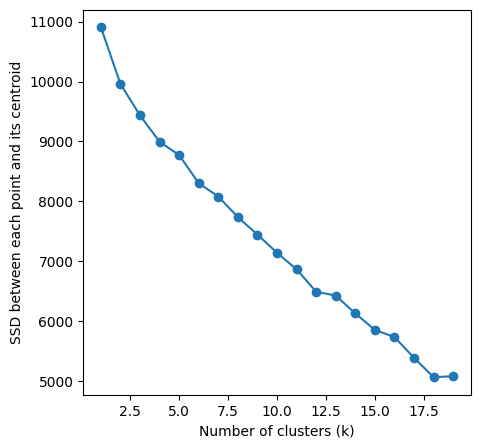

In [222]:
mrd.elbow_method(data, k_range=[1, 20], pp_object=pp_object)

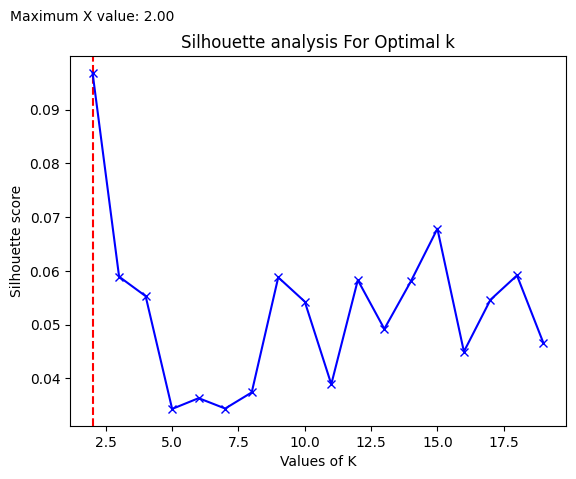

In [223]:
mrd.plot_elbow_silhouette_score(range_n_clusters=[2,20])

## Clusters: Size and Shape

ATENCION: 

debido a que primero se realiza una reduccion de dimensiones, el tamaño y la forma de cada cluster del gráfico puede ser distinto al encontrado en la realidad.

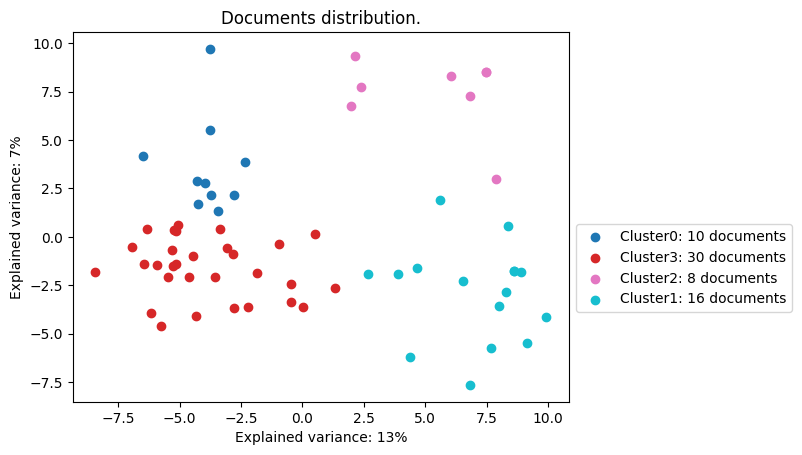

In [62]:
mrd.visualize_documents_kmeans(data, n_clusters=n_clusters, pp_object=pp_object)

# Combination: summarization for each topic's cluster

Apply T5 and BETO summarization to each cluster

In [9]:
# Models
beto = BETOSummary()
t5 = T5Summary()
mrd = MostRepresentativeDocs()

ckpt:
mrm8488/bert2bert_shared-spanish-finetuned-summarization


The following encoder weights were not tied to the decoder ['bert/pooler']
The following encoder weights were not tied to the decoder ['bert/pooler']


ckpt:
josmunpen/mt5-small-spanish-summarization


In [45]:
desafio = '18'
data = df.query(f'desafio == "{desafio}"')['texto'].values
pp_object = Preprocess(lemma=False, stopwords=False, alphanumeric=False, join=False)

In [46]:
labeled_docs = mrd.cluster_and_label_original_docs(data, 5, pp_object)

for key, values in labeled_docs.items():
    values = pp_object.preprocess(values)
    text = '.\n'.join(values)
    print(f'BERT, Cluster {key}:\n{beto.generate_summary(text)}\n\n')
    sleep(2)
    print(f'T5, Cluster {key}:\n{t5.generate_summary(text)}\n\n')

BERT, Cluster 4:
['Los horarios de limpieza de los banos. La carga horaria, hay periodo en los que ni siquiera tengo tiempo de almorzar', 'Los horarios de limpieza de los banos. La carga horaria, hay días en los que ni siquiera tengo tiempo para almorzar y en general']


T5, Cluster 4:
['la carga horaria y los horarios de limpieza de los banos', 'la carga horaria y los horarios de limpieza de los banos']


BERT, Cluster 3:
['Las materias del ciclo de fundamentos no tienen que ver con mi carrera, los horarios, el cansansio y la exigencia sostenida durante el ano.', 'La falta de apoyo par varios de los alunos ( 4 horas de diferencia ) para adaptarse en los pmieros anos']


T5, Cluster 3:
['la falta de apoyo a las materias del ciclo de fundamentos', 'la falta de apoyo a las materias del ciclo de fundamentos']


BERT, Cluster 1:
['Las clases en dh tienen mucho potencial pero dejan mucho que desear', 'Las clases en dh tienen mucho potencial pero dejan mucho que desear']


T5, Cluster 1:
['l

# Sample representative docs

In [31]:
desafio = '17'

documents = df[df['desafio']==desafio]['texto'].values

pp_object = Preprocess(lemma=False, stopwords=False, alphanumeric=False, join=False)

sr = SampleRepresentatives()
res = sr.get_sample(documents, pp_object=pp_object, n_clusters=5)

In [32]:
print(f'Desafio: {desafio}')
for key, value in res.items():
    print(f'\nCluster: {key}\n')
    for v in value[:3]:
        print(v)

Desafio: 17

Cluster: 1

Menos tareas extracurriculares ya que tenemos mucha carga horaria de cursada
mantas en la biblioteca.
Mejores horarios de cursada (menos baches).

Cluster: 3

Horarios mas normales
Horarios más estructurados, que sean o en la mañana o en la tarde, que estén juntos, y que estén distribuidos de forma uniforme a lo largo de la semana. 
más horarios de combis.

Cluster: 0

Comida sin harina en el kiosco 
Mesa de ping pong, canchita de futbol tenis y mesa teqball (es la mesa tipo ping pong para jugar con pelota de futbol)
más comidas hechas como tartas, ensaladas, etc

Cluster: 2

Estaria bueno que la experiencia 2023 tuviese clases magatrales mas pequeñas, de todas maneras me encanto como se dicto esta materia
Más sillitas para sentarse en el campus, más espacios con sombra natural, horarios de la combi más puntuales (desde la estación victoria siempre algún retraso tiene y eso hace que lleguemos tarde a clases)
La cursada sea menor, es decir, entiendo que el nivel